In [1]:
# 0. MNIST data
# Install tensorflow and keras
# pip install tensorflow keras

from tensorflow import keras
keras.datasets.mnist.load_data()

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [2]:
# a) # Check help() on keras.datasets.mnist.load_data()
help(keras.datasets.mnist.load_data)

Help on function load_data in module keras.src.datasets.mnist:

load_data(path='mnist.npz')
    Loads the MNIST dataset.
    
    This is a dataset of 60,000 28x28 grayscale images of the 10 digits,
    along with a test set of 10,000 images.
    More info can be found at the
    [MNIST homepage](http://yann.lecun.com/exdb/mnist/).
    
    Args:
        path: path where to cache the dataset locally
            (relative to `~/.keras/datasets`).
    
    Returns:
        Tuple of NumPy arrays: `(x_train, y_train), (x_test, y_test)`.
    
    **`x_train`**: `uint8` NumPy array of grayscale image data with shapes
      `(60000, 28, 28)`, containing the training data. Pixel values range
      from 0 to 255.
    
    **`y_train`**: `uint8` NumPy array of digit labels (integers in range 0-9)
      with shape `(60000,)` for the training data.
    
    **`x_test`**: `uint8` NumPy array of grayscale image data with shapes
      `(10000, 28, 28)`, containing the test data. Pixel values range
  

In [3]:
# b) Check the shapes of X_train, y_train, X_test, y_test
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)


(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [4]:
# c) How many images are in X_train?
print(X_train.shape[0])


60000


0 255


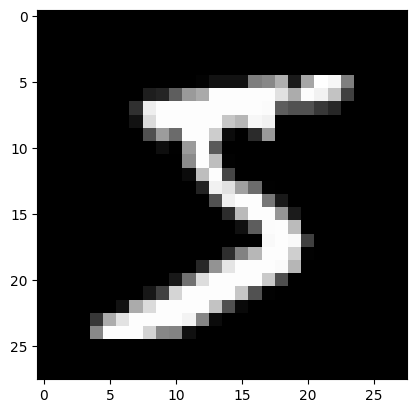

In [5]:
import matplotlib.pyplot as plt
# d) Check smallest and largest value a of sample image
print(X_train.min(), X_train.max())

# Plot image using plt.imshow()
plt.imshow(X_train[0], cmap='gray')

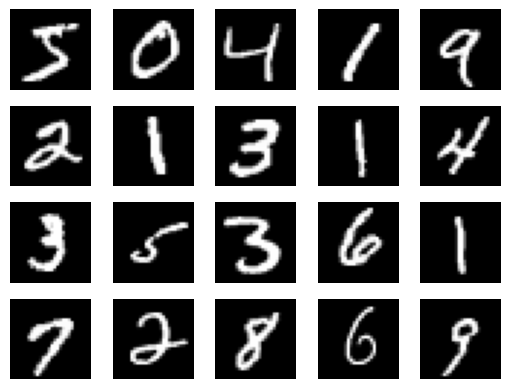

In [6]:
# e) Plot 20 sample images
fig, ax = plt.subplots(4, 5)
for i in range(20):
    ax[i//5, i%5].imshow(X_train[i], cmap='gray')
    ax[i//5, i%5].axis('off')
plt.show()


In [7]:
# f) Reshape X_train & X_test to appropriate shapes for 2D
X_train_2D = X_train.reshape(X_train.shape[0], -1)
X_test_2D = X_test.reshape(X_test.shape[0], -1)

In [8]:
# 1. Train|Test Validation Split
# Do a split on the training data to get validation data
from sklearn.model_selection import train_test_split
X_train_2D, X_val_2D, y_train, y_val = train_test_split(X_train_2D, y_train, test_size=0.2, random_state=42)


In [9]:
# 2. Hyperparameter Tuning
# import numpy as np
# import scipy.sparse as sp
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.metrics import accuracy_score

# # Convert X_train_2D and X_val_2D to sparse matrices
# X_train_sparse = sp.csr_matrix(X_train_2D)
# X_val_sparse = sp.csr_matrix(X_val_2D)

# # Define a set of k-values
# k_values = np.arange(1, 11)

# # List to store accuracy scores
# accuracy_scores = []

# # Loop through k-values
# for k in k_values:
#     # Create a KNN classifier
#     knn = KNeighborsClassifier(n_neighbors=k)
#     # Train the model using training data
#     knn.fit(X_train_sparse, y_train)
#     # Predict on validation data
#     y_pred = knn.predict(X_val_sparse)
#     # Calculate accuracy
#     accuracy = accuracy_score(y_val, y_pred)
#     # Append to list
#     accuracy_scores.append(accuracy)
#     print(f'k={k}, accuracy={accuracy}')

# # Elbow plot validation accuracy for different k in KNN
# plt.plot(k_values, accuracy_scores)
# plt.xlabel('k')
# plt.ylabel('Validation Accuracy')
# plt.title('Validation accuracy for different k in KNN')
# plt.show()


k=1, accuracy=0.86
k=2, accuracy=0.86
k=3, accuracy=0.87
k=4, accuracy=0.89
k=5, accuracy=0.895
k=6, accuracy=0.87
k=7, accuracy=0.87
k=8, accuracy=0.865
k=9, accuracy=0.855
k=10, accuracy=0.855


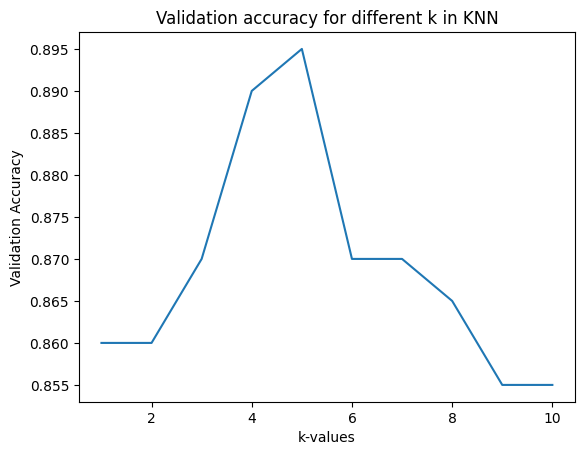

In [10]:
# Reduce memory usage, use a smaller sample of the data
X_train_2D = X_train_2D[:1000]
y_train = y_train[:1000]
X_val_2D = X_val_2D[:200]
y_val = y_val[:200]
X_test_2D = X_test_2D[:200]
y_test = y_test[:200]

# 2. Hyperparameter Tuning
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Define a set of k-values
k_values = range(1, 11)

# Initialize a list to store the accuracies
accuracy_scores = []

# Iterate over k-values
for k in k_values:
    #Initialize KNN classifier with current k-value
    knn = KNeighborsClassifier(n_neighbors=k)
    # Train the model using training data
    knn.fit(X_train_2D, y_train)
    # Make predictions on validation data
    y_val_pred = knn.predict(X_val_2D)
    # Calculate accuracy score
    accuracy = accuracy_score(y_val, y_val_pred)
    # Append accuracy score to the list
    accuracy_scores.append(accuracy)
    print(f'k={k}, accuracy={accuracy}')

# Elbow plot the validation accuracy against k-values
plt.plot(k_values, accuracy_scores)
plt.xlabel('k-values')
plt.ylabel('Validation Accuracy')
plt.title('Validation accuracy for different k in KNN')
plt.show()

In [14]:
# 3. Train and predict
# Train the KNN model using the best k-value and make predictions on the test data.
# Select the best k-value
best_k = k_values[accuracy_scores.index(max(accuracy_scores))]
print(f'Best k-value: {best_k}')

# Initialize KNN classifier with the best k-value
knn = KNeighborsClassifier(n_neighbors=best_k)
# Train the model using the training data
knn.fit(X_train_2D, y_train)
# Make predictions on the test data
y_test_pred = knn.predict(X_test_2D)
# Calculate accuracy score
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Test accuracy: {test_accuracy}')



Best k-value: 5
Test accuracy: 0.885


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       0.78      1.00      0.88        28
           2       1.00      0.69      0.81        16
           3       0.88      0.94      0.91        16
           4       0.92      0.79      0.85        28
           5       0.94      0.85      0.89        20
           6       0.91      1.00      0.95        20
           7       0.84      0.88      0.86        24
           8       0.90      0.90      0.90        10
           9       0.85      0.81      0.83        21

    accuracy                           0.89       200
   macro avg       0.90      0.88      0.89       200
weighted avg       0.89      0.89      0.88       200



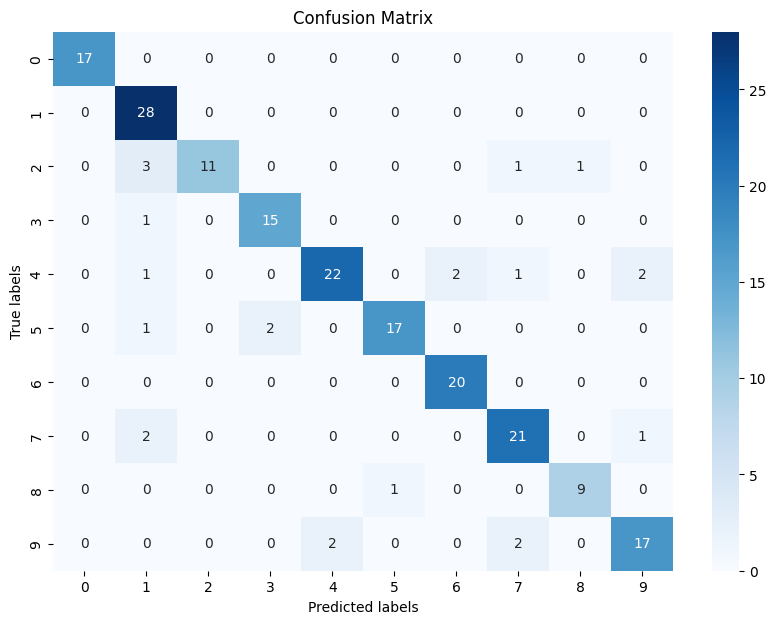

In [18]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report
import pandas as pd
# 3. a) Do a classification report
print(classification_report(y_test, y_test_pred))

# 3. b) Plot a confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()




In [22]:
# 3. c) Compute the number of misclassifications for each number
misclassifications = []
for i in range(10):
    misclassifications.append(sum((y_test == i) & (y_test_pred != i)))
misclassifications = pd.DataFrame(misclassifications, index=range(10), columns=['Misclassifications'])
print(misclassifications)

print(f'\nNumber with most misclassifications: {misclassifications.idxmax()[0]}')

   Misclassifications
0                   0
1                   0
2                   5
3                   1
4                   6
5                   3
6                   0
7                   3
8                   1
9                   4

Number with most misclassifications: 4


C:\Users\user\AppData\Local\Temp\ipykernel_11996\1149585085.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f'\nNumber with most misclassifications: {misclassifications.idxmax()[0]}')
